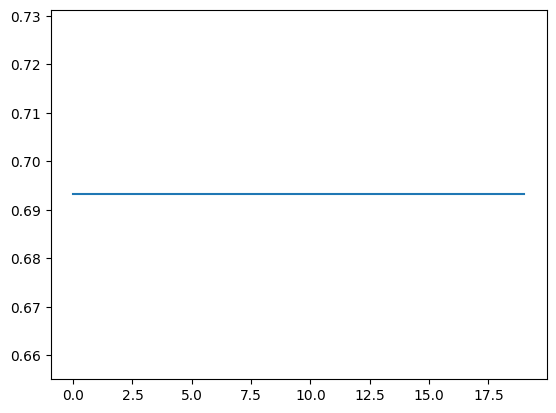

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X,y = make_blobs(n_samples = 100 , centers = 2 , random_state=42)
class CustomLogisticRegression:
    def __init__(self,lr=0.1 , iters=20):
        self._lr=lr
        self._iters=iters

    def fit(self, X , y):
        self._y = y.reshape(-1,1)
        X_mod = np.hstack([np.ones([len(X),1]),X])
        self._X = X_mod
        self._theta = np.zeros([X_mod.shape[1],1])

        err = []
        for i in range(self._iters):
            err.append(self.error())
            self.gradient_ascend()

        self.theta_ = self._theta
        return err

    def gradient_ascend(self):
        yh=self.hypothesis(self._X)
        ya=self._y
        diff = -(ya-yh)
        return np.dot(self._X.T,diff)*self._lr

    def hypothesis(self,X):
        prod = np.dot(X , self._theta)
        return 1 / (1 + np.exp(-prod))
        
    def error(self):
        yh= self.hypothesis(self._X)
        ya= self._y 
        ll = ya * np.log(yh) + (1-ya)*np.log(1-yh)
        return -np.mean(ll)

    def predict(self,X):
        X_mod = np.hstack([np.ones([len(X) , 1 ]),X])
        yh= self.hypothesis(X_mod)
        return (yh > .5).astype(int).flatten()

    def score(self,X,y):
        yp= self.predict(X)
        return np.mean(yp==y)
model = CustomLogisticRegression()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
err = model.fit(X_train , y_train)
model
plt.plot(err)